In [1]:
#Import required packages
import requests
import json
import netCDF4 
from netCDF4 import Dataset as NetCDFFile 
import xarray as xr

In [2]:
#Argo parameters and related units
parameters = ['sea_water_temperature',  'sea_water_salinity', 'mass_concentration_of_chlorophyll_a_in_sea_water', 'moles_of_nitrate_per_unit_mass_in_sea_water']
units = ['degree_Celsius', 'psu', 'mg/m3', 'micromole/kg']

In [1]:
#Regions (in polygons)
BlackSea = [[28.8, 44.516669], [29.05, 44.866667], [29.166666, 44.783335], [29.649999, 45.000002], [29.666666, 45.216667], [ 29.683332, 45.7 ], [ 30.649999, 46.350002 ], [ 31.566665, 46.766669 ], [ 31.816665, 46.616667 ], [ 31.816665, 47.116667 ], [ 31.933332, 46.766669 ], [ 32.65, 46.633335 ], [ 31.583334, 46.550002 ], [ 31.983334, 46.350002 ], [ 32.766668, 46.133335 ], [ 33.65, 46.016669 ], [ 32.533334, 45.466667 ], [ 33.166665, 45.2 ], [ 33.550001, 44.833334 ], [ 33.633334, 44.433334 ], [ 35.15, 44.883335 ], [ 35.833333, 45.000002 ], [ 36.154073, 45.136317 ], [ 36.499999, 45.283335 ], [ 35.716666, 45.333334 ], [ 34.866666, 45.933334 ], [ 35.216666, 46.400001 ], [ 35.050001, 46.133335 ], [ 35.366666, 46.350002 ], [ 36.866666, 46.766669 ], [ 38.550001, 47.21667 ], [ 39.083333, 47.283335 ], [ 39.266668, 47.083334 ], [ 38.383334, 46.733336 ], [ 37.850001, 46.616667 ], [ 38.566667, 46.100002 ], [ 38.233332, 46.133335 ], [ 38.050001, 45.816668 ], [ 37.933333, 46.033335 ], [ 37.750001, 45.45 ], [ 36.850001, 45.366667 ], [ 36.583333, 45.183334 ], [ 36.679048, 45.138706 ], [ 37.941667, 44.55 ], [ 39.300001, 43.916666 ], [ 40.800001, 43.083334 ], [ 41.633334, 42.266669 ], [ 41.516668, 41.500002 ], [ 39.883334, 40.95 ], [ 38.633334, 40.966667 ], [ 37.383334, 41.216667 ], [ 36.133334, 41.466667 ], [ 35.766668, 41.666666 ], [ 35.100001, 41.916666 ], [ 34.466666, 41.966667 ], [ 33.458333, 41.866668 ], [ 32.449999, 41.766669 ], [ 30.966667, 41.066668 ], [ 29.505229, 41.105126 ], [ 29.151689, 41.212977 ], [ 29.149166, 41.217056 ], [ 29.14905, 41.217063 ], [ 29.149158, 41.217171 ], [ 29.109556, 41.234188 ], [ 28.857604, 41.19828 ], [ 28.823641, 41.207271 ], [ 28.633333, 41.350002 ], [ 28.016666, 41.983336 ], [ 27.649999, 42.416666 ], [ 27.899999, 42.783335], [28.25, 43.400001 ], [ 28.583331, 43.750002 ], [ 28.8, 44.516669 ]]
Mediterranean = [[-6.036421, 36.188783], [ -4.597287, 36.57266 ], [-3.438954, 36.689327], [-1.813954, 37.205992], [-0.980622, 37.589326 ], [ -0.763954, 37.839326 ], [ 0.069376, 38.639327 ], [ -0.018308, 38.803736 ], [ -0.330621, 39.389327 ], [ 0.236044, 40.09766 ], [ 0.80271, 40.805993 ], [ 1.886043, 41.27266 ], [ 2.969375, 41.739327 ], [ 3.062235, 41.999332 ], [ 3.219375, 42.439324 ], [ 3.149998, 43.083334 ], [ 3.766664, 43.45 ], [ 4.599998, 43.433334 ], [ 4.733332, 43.516669 ], [ 5.066665, 43.416666 ], [ 6.366665, 43.083334 ], [ 8.499999, 44.316668 ], [ 9.833331, 44.100002 ], [ 12.216665, 45.266669 ], [ 13.149999, 45.7 ], [ 13.699772, 45.563162 ], [ 13.869273, 45.279355 ], [ 14.091415, 44.940931 ], [ 14.362429, 45.167333 ], [ 15.042071, 44.202736 ], [ 15.304659, 43.972548 ], [ 16.230731, 43.494749 ], [ 17.39638, 42.97261 ], [ 17.617291, 42.936822 ], [ 17.672329, 42.956308 ], [ 17.673028, 42.943536 ], [ 17.604579, 42.90992 ], [ 16.922242, 42.947382 ], [ 18.382742, 42.435061 ], [ 19.037592, 42.131204 ], [ 26.05, 40.733333 ], [ 26.683332, 40.633335 ], [ 27.449998, 40.850002 ], [ 29.033332, 41.050002 ], [ 28.823641, 41.207271 ], [ 28.857604, 41.19828 ], [ 29.109556, 41.234188 ], [ 29.149158, 41.217171 ], [ 29.14905, 41.217063 ], [ 29.149166, 41.217056 ], [ 29.151689, 41.212977 ], [ 29.505229, 41.105126 ], [ 29.066665, 41.116667 ], [ 29.516666, 40.766669 ], [ 29.8, 40.733333 ], [ 29.0, 40.466667 ], [ 27.783332, 40.500002 ], [ 27.433332, 40.316668 ], [ 29.983334, 36.2 ], [ 30.5, 36.433334 ], [ 30.75, 36.850002 ], [ 32.283334, 36.283335 ], [ 33.083333, 36.066668 ], [ 34.166665, 36.466667 ], [ 34.983332, 36.716667 ], [ 35.65, 36.666666 ], [ 36.116666, 36.866667 ], [ 35.949999, 36.100002 ], [ 35.916665, 35.933334 ], [ 35.966666, 34.650001 ], [ 35.533334, 33.875002 ], [ 35.100001, 33.100002 ], [ 34.658334, 32.216669 ], [ 34.216666, 31.333335 ], [ 32.766668, 31.066666 ], [ 32.283334, 31.133334 ], [ 32.011049, 31.328325 ], [ 31.116667, 31.550001 ], [ 30.649999, 31.433333 ], [ 30.966667, 31.583335 ], [ 30.266666, 31.283333 ], [ 28.833331, 30.9 ], [ 27.324998, 31.258334 ], [ 25.816665, 31.616668 ], [ 25.149999, 31.65 ], [ 24.616667, 32.0 ], [ 23.083331, 32.333334 ], [ 22.916666, 32.683334 ], [ 21.616667, 32.933334 ], [ 20.841666, 32.55 ], [ 20.066665, 32.166666 ], [ 20.033332, 30.816666 ], [ 19.0, 30.266667 ], [ 17.875, 30.741668 ], [ 16.749999, 31.216668 ], [ 15.616665, 31.500001 ], [ 15.183333, 32.400001 ], [ 14.091666, 32.625002 ], [ 12.999999, 32.850002 ], [ 11.533332, 33.166666 ], [ 10.916664, 33.550002 ], [ 10.033332, 34.016669 ], [ 10.574999, 34.625001 ], [ 11.116037, 35.232627 ], [ 11.116665, 35.233333 ], [ 10.516665, 35.966667 ], [ 11.049999, 37.016669 ], [ 10.865797, 36.929415 ], [ 10.416664, 36.716667 ], [ 10.166664, 37.033335 ], [ 9.783332, 37.233333 ], [ 8.616665, 36.900001 ], [ 7.066665, 36.916666 ], [ 6.233332, 36.916666 ], [ 5.099998, 36.766669 ], [ 3.974999, 36.758336 ], [ 2.849999, 36.750002 ], [ 1.533332, 36.433335 ], [ 0.216664, 36.116667 ], [ -0.299999, 35.866667 ], [ -1.193067, 35.501675 ], [ -1.258333, 35.475001 ], [ -2.216666, 35.083334 ], [ -2.899999, 35.266669 ], [ -3.183333, 35.233333 ], [ -4.916666, 35.316668 ], [ -5.418623, 35.833388 ], [ -5.483333, 35.900001 ], [ -5.934025, 35.558566 ], [ -5.93933, 35.558566 ], [ -5.925811, 35.794514 ], [ -6.034955, 36.177788 ], [ -6.03592, 36.181179 ], [-6.036421, 36.188783]] 
Baltic = [[9.716665, 54.800002], [9.449998, 54.816668], [9.566666, 55.050002], [9.749999, 55.566668], [9.733332, 55.683334], [ 9.822646, 55.73814 ], [ 10.466665, 56.133335 ], [ 10.766665, 56.533335 ], [ 10.216665, 56.550002 ], [ 9.954023, 56.926026 ], [ 9.791774, 56.892477 ], [ 9.822969, 56.970907 ], [ 10.199998, 56.983336 ], [ 10.633332, 57.71667 ], [ 10.2903, 57.558766 ], [ 10.483564, 57.688981 ], [ 10.611314, 57.740916 ], [ 10.6575, 57.7375 ], [ 11.607538, 57.744962 ], [ 11.607537, 57.74496 ], [ 11.6075, 57.7449 ], [ 11.6108, 57.745 ], [ 11.634034, 57.745177 ], [ 11.638283, 57.743114 ], [ 11.63928, 57.745219 ], [ 11.6741, 57.745492 ], [ 11.6941, 57.7442 ], [ 11.743333, 57.74625 ], [ 11.875397, 57.745811 ], [ 12.566666, 56.833334 ], [ 12.716665, 56.21667 ], [ 12.745005, 56.133421 ], [ 12.983332, 55.433334 ], [ 13.161237, 55.425123 ], [ 14.066666, 55.383335 ], [ 14.333331, 55.933334 ], [ 15.999999, 56.200003 ], [ 16.291665, 56.991669 ], [ 16.583331, 57.783335 ], [ 16.699998, 57.733336 ], [ 16.55, 57.983336 ], [ 16.716666, 58.400001 ], [ 16.749999, 58.416666 ], [ 16.433332, 58.633335 ], [ 16.899999, 58.616667 ], [ 17.616664, 59.083334 ], [ 17.749999, 58.916666 ], [ 18.466666, 59.333334 ], [ 16.632842, 59.41365 ], [ 16.965909, 59.492772 ], [ 17.499999, 59.533335 ], [ 17.48952, 59.617159 ], [ 17.528144, 59.626334 ], [ 17.816665, 59.366667 ], [ 18.866664, 59.800002 ], [ 18.750059, 59.916608 ], [ 18.449998, 60.21667 ], [ 17.399999, 60.633335 ], [ 17.266666, 61.71667 ], [ 17.449998, 62.316668 ], [ 17.699998, 62.500002 ], [ 17.883333, 62.916671 ], [ 18.55, 62.983336 ], [ 19.05, 63.21667 ], [ 20.0, 63.600002 ], [ 20.369649, 63.798689 ], [ 21.333331, 64.316672 ], [ 21.116667, 64.816672 ], [ 21.416666, 65.316672 ], [ 22.016666, 65.600005 ], [ 22.233331, 65.550003 ], [ 22.366667, 65.716667 ], [ 22.783332, 65.850005 ], [ 24.166666, 65.816672 ], [ 24.633333, 65.883337 ], [ 25.066665, 65.616668 ], [ 25.116667, 64.883337 ], [ 23.149999, 63.883335 ], [ 22.349999, 63.350002 ], [ 21.745569, 63.152189 ], [ 21.433332, 63.050002 ], [ 21.383333, 61.933337 ], [ 21.433332, 60.683337 ], [ 22.466666, 60.400001 ], [ 22.449998, 60.250002 ], [ 22.899999, 60.300002 ], [ 23.166666, 59.883335 ], [ 23.226116, 59.908367 ], [ 23.483334, 60.016669 ], [ 26.0, 60.383335 ], [ 26.566665, 60.550002 ], [ 27.866667, 60.566668 ], [ 28.433332, 60.566668 ], [ 28.6, 60.383335 ], [ 30.25, 59.96667 ], [ 29.199998, 60.000002 ], [ 28.216667, 59.683337 ], [ 27.85, 59.400001 ], [ 25.416666, 59.533335 ], [ 23.646087, 59.160581 ], [ 23.516666, 59.133335 ], [ 23.599999, 58.783335 ], [ 23.889595, 58.475057 ], [ 24.116667, 58.233336 ], [ 24.466666, 58.250002 ], [ 24.416666, 57.333334 ], [ 23.783332, 56.96667 ], [ 22.633333, 57.583334 ], [ 21.721725, 57.56676 ], [ 21.7133, 57.5746 ], [ 21.717011, 57.566674 ], [ 21.716666, 57.566668 ], [ 20.983331, 56.233336 ], [ 20.982766, 54.903881 ], [ 20.906439, 54.726699 ], [ 20.334748, 54.772527 ], [ 20.315942, 54.687417 ], [ 20.443821, 54.667777 ], [ 20.447582, 54.637224 ], [ 20.312181, 54.60449 ], [ 20.259236, 54.429227 ], [ 19.613980587213586, 54.477403651145657 ], [ 18.566665, 54.450003 ], [ 18.427709, 54.723259 ], [ 17.066665, 54.666666 ], [ 15.649999, 54.3 ], [ 13.783332, 54.050002 ], [ 12.566666, 54.383335 ], [ 12.649999, 54.450003 ], [ 11.199998, 53.983336 ], [ 10.883332, 54.100002 ], [ 10.933333, 54.383335 ], [ 9.849998, 54.483336 ], [ 9.746742075665118, 54.728569820294609 ], [ 9.746741, 54.72857 ], [ 9.716665, 54.800002 ]]
WMED = [[-6.036421, 36.188783], [-4.597287, 36.57266], [-3.438954, 36.689327], [-2.28062, 36.805994], [-2.250515, 36.831799], [ -1.813954, 37.205992 ], [ -0.980622, 37.589326 ], [ -0.763954, 37.839326 ], [ 0.069376, 38.639327 ], [ -0.018308, 38.803736 ], [ -0.330621, 39.389327 ], [ 0.236044, 40.09766 ], [ 0.80271, 40.805993 ], [ 1.886043, 41.27266 ], [ 2.969375, 41.739327 ], [ 3.062235, 41.999332 ], [ 3.219375, 42.439324 ], [ 3.149998, 43.083334 ], [ 3.766664, 43.45 ], [ 4.599998, 43.433334 ], [ 4.733332, 43.516669 ], [ 5.066665, 43.416666 ], [ 6.397188820445455, 43.176582594327876 ], [ 8.530522820445457, 44.409916594327875 ], [ 9.833331, 44.100002 ], [ 10.533332, 43.066668 ], [ 10.594423, 43.018754 ], [ 11.383332, 42.400002 ], [ 12.233332, 41.733336 ], [ 12.527147, 41.613973 ], [ 12.586373, 41.589913 ], [ 13.299999, 41.300002 ], [ 14.449998, 40.616667 ], [ 14.999999, 40.400001 ], [ 15.499999, 40.066668 ], [ 16.099999, 39.016669 ], [ 15.703604, 38.253241 ], [ 15.702954, 38.253708 ], [ 15.652804, 38.265148 ], [ 15.649328, 38.265326 ], [ 15.649999, 38.266669 ], [ 15.638965, 38.265858 ], [ 15.525078, 38.271698 ], [ 15.494684, 38.255249 ], [ 14.516666, 38.183336 ], [ 13.383332, 38.100002 ], [ 12.499999, 38.000002 ], [ 12.620158, 37.791726 ], [ 12.421212, 37.799927 ], [ 12.421505, 37.799595 ], [ 12.422385, 37.799595 ], [ 11.049193, 37.085274 ], [ 11.048945, 37.085274 ], [ 10.865797, 36.929415 ], [ 10.416664, 36.716667 ], [ 10.166664, 37.033335 ], [ 9.783332, 37.233333 ], [ 8.616665, 36.900001 ], [ 7.066665, 36.916666 ], [ 6.233332, 36.916666 ], [ 5.099998, 36.766669 ], [ 3.974999, 36.758336 ], [ 2.849999, 36.750002 ], [ 1.533332, 36.433335 ], [ 0.216664, 36.116667 ], [ -0.299999, 35.866667 ], [ -1.193067, 35.501675 ], [ -1.258333, 35.475001 ], [ -2.216666, 35.083334 ], [ -2.899999, 35.266669 ], [ -3.183333, 35.233333 ], [ -4.916666, 35.316668 ], [ -5.418623, 35.833388 ], [ -5.483333, 35.900001 ], [ -5.934025, 35.558566 ], [ -5.93933, 35.558566 ], [ -5.925811, 35.794514 ], [ -6.034955, 36.177788 ], [ -6.03592, 36.181179 ], [ -6.036421, 36.188783 ]]
EMED = [[20.066665, 39.683334], [22.666666, 40.366667], [22.983331, 40.533335], [23.766666, 40.633335], [24.883333, 40.916666], [ 26.05, 40.733333 ], [ 26.683332, 40.633335 ], [ 27.449998, 40.850002 ], [ 29.033332, 41.050002 ], [ 28.823641, 41.207271 ], [ 28.857604, 41.19828 ], [ 29.109556, 41.234188 ], [ 29.149158, 41.217171 ], [ 29.14905, 41.217063 ], [ 29.149166, 41.217056 ], [ 29.151689, 41.212977 ], [ 29.505229, 41.105126 ], [ 29.066665, 41.116667 ], [ 29.516666, 40.766669 ], [ 29.8, 40.733333 ], [ 29.0, 40.466667 ], [ 27.783332, 40.500002 ], [ 27.433332, 40.316668 ], [ 26.367382, 39.964531 ], [ 32.283334, 36.283335 ], [ 34.166665, 36.466667 ], [ 34.983332, 36.716667 ], [ 35.65, 36.666666 ], [ 36.116666, 36.866667 ], [ 35.949999, 36.100002 ], [ 35.916665, 35.933334 ], [ 35.966666, 34.650001 ], [ 35.533334, 33.875002 ], [ 35.100001, 33.100002 ], [ 34.658334, 32.216669 ], [ 34.216666, 31.333335 ], [ 32.766668, 31.066666 ], [ 32.283334, 31.133334 ], [ 32.011049, 31.328325 ], [ 31.116667, 31.550001 ], [ 30.649999, 31.433333 ], [ 30.966667, 31.583335 ], [ 30.266666, 31.283333 ], [ 28.833331, 30.9 ], [ 27.324998, 31.258334 ], [ 25.816665, 31.616668 ], [ 25.149999, 31.65 ], [ 24.616667, 32.0 ], [ 23.083331, 32.333334 ], [ 22.916666, 32.683334 ], [ 21.616667, 32.933334 ], [ 20.841666, 32.55 ], [ 20.066665, 32.166666 ], [ 20.033332, 30.816666 ], [ 19.0, 30.266667 ], [ 17.875, 30.741668 ], [ 16.749999, 31.216668 ], [ 15.616665, 31.500001 ], [ 15.183333, 32.400001 ], [ 14.091666, 32.625002 ], [ 12.999999, 32.850002 ], [ 11.533332, 33.166666 ], [ 10.916664, 33.550002 ], [ 10.033332, 34.016669 ], [ 10.574999, 34.625001 ], [ 11.116037, 35.232627 ], [ 11.116665, 35.233333 ], [ 10.516665, 35.966667 ], [ 11.049999, 37.016669 ], [ 10.865797, 36.929415 ], [ 11.048945, 37.085274 ], [ 11.049193, 37.085274 ], [ 12.422385, 37.799595 ], [ 12.421505, 37.799595 ], [ 12.421212, 37.799927 ], [ 12.620158, 37.791726 ], [ 12.749999, 37.566668 ], [ 13.941666, 37.116667 ], [ 15.13313, 36.666742 ], [ 15.133332, 36.666666 ], [ 15.166664, 37.300002 ], [ 15.649999, 38.150001 ], [ 16.066665, 37.916666 ], [ 16.566665, 38.566668 ], [ 16.966666, 38.933334 ], [ 17.149999, 39.2 ], [ 16.633333, 39.616667 ], [ 16.916666, 40.45 ], [ 17.516666, 40.300002 ], [ 18.199998, 39.833334 ], [ 18.264077, 39.956914 ], [ 18.433332, 40.283335 ], [ 17.208332, 40.858335 ], [ 15.983332, 41.433334 ], [ 16.183332, 41.783335 ], [ 15.833331, 41.916666 ], [ 14.566666, 42.216667 ], [ 14.099999, 42.858335 ], [ 13.633332, 43.500002 ], [ 12.683333, 43.983336 ], [ 12.349998, 44.800002 ], [ 12.216665, 45.266669 ], [ 13.149999, 45.7 ], [ 13.699772, 45.563162 ], [ 13.869273, 45.279355 ], [ 14.091415, 44.940931 ], [ 14.362429, 45.167333 ], [ 15.042071, 44.202736 ], [ 15.304659, 43.972548 ], [ 16.230731, 43.494749 ], [ 18.382742, 42.435061 ], [ 19.037592, 42.131204 ], [ 19.358203, 41.866208 ], [ 19.449998, 40.533335 ], [ 20.010962, 39.760114 ], [ 20.066665, 39.683334 ]]

In [2]:
type()

[[[20.066665, 39.683334],
  [22.666666, 40.366667],
  [22.983331, 40.533335],
  [23.766666, 40.633335],
  [24.883333, 40.916666],
  [26.05, 40.733333],
  [26.683332, 40.633335],
  [27.449998, 40.850002],
  [29.033332, 41.050002],
  [28.823641, 41.207271],
  [28.857604, 41.19828],
  [29.109556, 41.234188],
  [29.149158, 41.217171],
  [29.14905, 41.217063],
  [29.149166, 41.217056],
  [29.151689, 41.212977],
  [29.505229, 41.105126],
  [29.066665, 41.116667],
  [29.516666, 40.766669],
  [29.8, 40.733333],
  [29.0, 40.466667],
  [27.783332, 40.500002],
  [27.433332, 40.316668],
  [26.367382, 39.964531],
  [32.283334, 36.283335],
  [34.166665, 36.466667],
  [34.983332, 36.716667],
  [35.65, 36.666666],
  [36.116666, 36.866667],
  [35.949999, 36.100002],
  [35.916665, 35.933334],
  [35.966666, 34.650001],
  [35.533334, 33.875002],
  [35.100001, 33.100002],
  [34.658334, 32.216669],
  [34.216666, 31.333335],
  [32.766668, 31.066666],
  [32.283334, 31.133334],
  [32.011049, 31.328325],
  [31.

In [4]:
#Input fields
parameter = 'sea_water_temperature' #Choose from Argo parameters and related units
unit = 'degree_Celsius' #Choose from Argo parameters and related units --> make sure that it corresponds with the parameter
mintemporal = 63*365 #Days since 1950
maxtemporal = 72*365 #Days since 1950
region = Mediterranean #Choose from regions
regionname = 'Mediterranean' #Choose same name from regions
mindepth = 0 #Minimum water depth
maxdepth = 10 #Maximum water depth

In [5]:
#Query body based on input fields
def query(parameter, unit, mintemporal, maxtemporal, region, mindepth, maxdepth):
    body = {
        "query_parameters": [
            {
                "data_parameter": parameter,
                "unit": unit,
                "skip_fill_values": True,
                "alias": parameter
            },
            {
                "data_parameter": "time",
                "unit": "days since 1950-01-01 00:00:00 UTC",
                "skip_fill_values": False,
                "alias": "TEMPORAL"
            },
            {
                "data_parameter": "sea_water_pressure",
                "unit": "decibar",
                "include_original_data": False,
                "alias": "DEPTH"
            },
            {
                "data_parameter": "longitude",
                "unit": "degree_east",
                "skip_fill_values": False,
                "alias": "LONGITUDE"
            },
            {
                "data_parameter": "latitude",
                "unit": "degree_north",
                "skip_fill_values": False,
                "alias": "LATITUDE"
            }
        ],
        "filters": [
            {
                "for_query_parameter": {
                    "alias": "TEMPORAL"
                },
                "min": mintemporal,
                "max": maxtemporal
            },
            {
                "for_query_parameter": {
                    "alias": "DEPTH"
                },
                "min": mindepth,
                "max": maxdepth
            },
            {
                "longitude_query_parameter": {
                    "alias": "LONGITUDE"
                },
                "latitude_query_parameter": {
                    "alias": "LATITUDE"
                },
                "geometry": {
                    "coordinates": [
                            region
                    ]
                    ,
                    "type": "Polygon"
                }
            }
        ],
        "output": {
            "format": "netcdf"
        }}
    return body

query = query(parameter, unit, mintemporal, maxtemporal, region, mindepth, maxdepth)

In [6]:
#Post request with the above specified body -> will create a Netcdf file in your directory -> output here shown as a dataframe
response = requests.post("http://beacon-argo/api/query", json.dumps(query), headers = {'Content-type': 'application/json'})
open(f'Argo_{parameter}_{regionname}_{int(mintemporal/365+1950)}-{int(maxtemporal/365+1950)-1}_[{mindepth}-{maxdepth}m].nc', 'wb').write(response.content)
df = xr.open_dataset(f'Argo_{parameter}_{regionname}_{int(mintemporal/365+1950)}-{int(maxtemporal/365+1950)-1}_[{mindepth}-{maxdepth}m].nc').to_dataframe()
df

,sea_water_temperature,TEMPORAL,DEPTH,LONGITUDE,LATITUDE,dataset_id
OBSERVATIONS,,,,,,
0,18.674999,2012-12-17 14:01:19.999996160,4.40,24.384000,35.002000,2665092
1,18.676001,2012-12-17 14:01:19.999996160,10.00,24.384000,35.002000,2665092
2,18.660999,2012-12-17 14:01:19.999996160,0.10,24.384000,35.002000,2665092
3,18.662001,2012-12-17 14:01:19.999996160,0.20,24.384000,35.002000,2665092
4,18.650999,2012-12-17 14:01:19.999996160,0.10,24.384000,35.002000,2665092
...,...,...,...,...,...,...
1088295,16.430000,2016-02-10 10:35:00.000000000,9.54,22.036503,35.225263,2850832
1088296,16.430000,2016-02-10 10:35:00.000000000,9.70,22.036503,35.225263,2850832
1088297,16.430000,2016-02-10 10:35:00.000000000,9.80,22.036503,35.225263,2850832


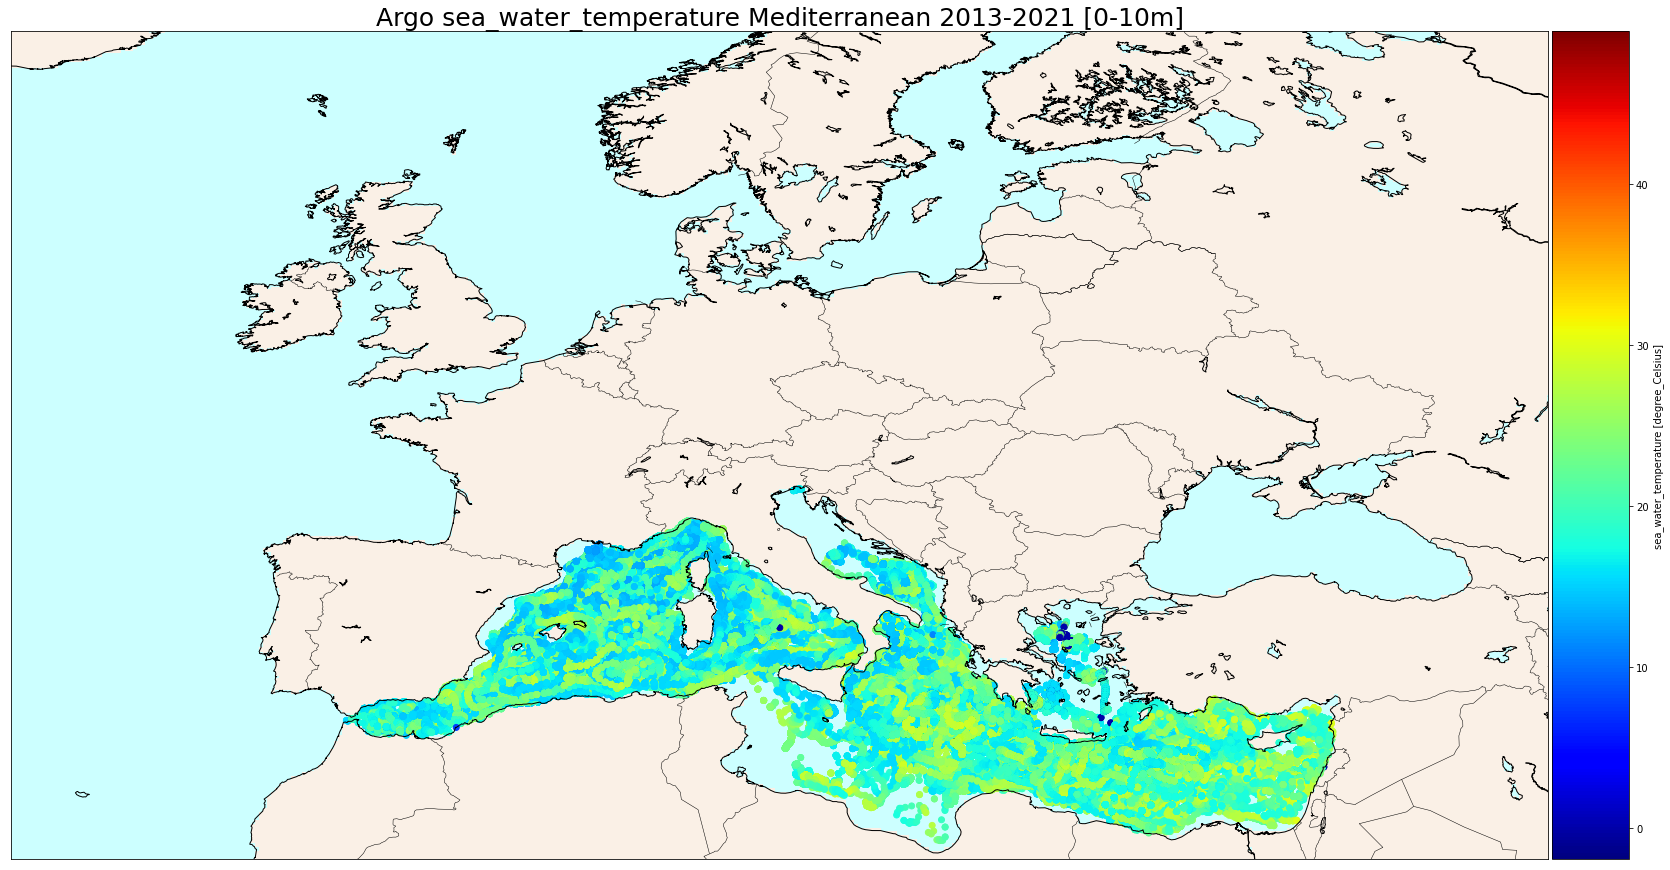

In [7]:
#Plot results
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(1, figsize = (29, 19))

# Creating Basemap
m = Basemap(projection = 'cyl', llcrnrlon = -20, llcrnrlat = 30, urcrnrlon = 45, urcrnrlat = 65, resolution = 'i') 
m.drawlsmask(land_color = 'Linen', ocean_color = '#CCFFFF'); # can use HTML names or codes for colors
m.drawcoastlines()
m.drawcountries()

# Plot points
sc = m.scatter(df['LONGITUDE'], df['LATITUDE'], latlon = True, c = df[f'{parameter}'], cmap = plt.cm.jet)

plt.title(f'Argo {parameter} {regionname} {int(mintemporal/365+1950)}-{int(maxtemporal/365+1950)-1} [{mindepth}-{maxdepth}m]', fontsize = 25)

# Colorbar positioning
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
plt.colorbar(sc, cax = cax, label = f'{parameter} [{unit}]');